# **Importação de bilbiotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
%matplotlib inline
import seaborn as sns


In [ ]:
##from google.colab import drive
drive.mount('/content/drive')

# **BX-Book-Ratings**

In [ ]:
##Ratings =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Book-Ratings.csv', sep=";", encoding='cp1252')

In [ ]:
df_book  = pd.read_excel('mini_book_rating.xlsx')

**- Exploração de dados**

In [ ]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      149 non-null    int64 
 1   ISBN         149 non-null    object
 2   Book-Rating  149 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


In [ ]:
df_book.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [ ]:
df_book.describe()

,User-ID,Book-Rating
count,149.000000,149.000000
mean,276782.093960,3.577181
std,27.874318,4.017161
min,276725.000000,0.000000
25%,276762.000000,0.000000
50%,276786.000000,0.000000
75%,276806.000000,8.000000
max,276822.000000,10.000000


In [ ]:
df = df_book 

In [ ]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
df['ISBN'].value_counts()

3442437407    2
034545104X    1
3499134004    1
3548603203    1
3764501383    1
             ..
3453877241    1
3492226604    1
3517017442    1
3596125006    1
1573248533    1
Name: ISBN, Length: 148, dtype: int64

**- Tratamento de dados**

Após o entendimento dos dados faremos a criação e análise de grafos, trocando o nome das colunas para facilitar o entendimento:

In [ ]:
df = pd.DataFrame({'from': df['User-ID'],
                  'to': df['Book-Rating']
                  })

In [ ]:
df

,from,to
0,276725,0
1,276726,5
2,276727,0
3,276729,3
4,276729,6
...,...,...
144,276822,9
145,276822,10
146,276822,10
147,276822,8


**Funções auxiliares**

In [ ]:
# Função utilizada para encontrar os vizinhos dos nós de um grafo e retorna essa informação na forma de dicionário
def pegar_vizinhos(grafo):
  vizinhos = {}
  for n in grafo:
    vizinhos[n] = list(grafo.neighbors(n))
  
  return vizinhos

In [ ]:
# Função para criar um grafo a partir dos grupos de nós (comunidades) e dos vizinhos do grafo original
def criarGrafo(vizinhos, grupo_de_nos):
  novos_grafos = []

  for x in range(len(grupo_de_nos)):
    grupo = grupo_de_nos[x]
    novo_grafo = nx.Graph()
    for no in grupo:
      lista_de_vizinhos_no = vizinhos[no]
      for v in lista_de_vizinhos_no:
        if (v in grupo):
          novo_grafo.add_edge(no, v)
    novos_grafos.append(novo_grafo)

  return novos_grafos

In [ ]:
# Função para criar grafo da maior componente de uma rede
def criarGrafoDaMaiorComponente(vizinhos, maiorComponente):
  novo_grafo = nx.Graph()
  for no in maiorComponente:
    lista_de_vizinhos_no = vizinhos[no]
    for v in lista_de_vizinhos_no:
      if (v in maiorComponente):
        novo_grafo.add_edge(no, v)
  
  return novo_grafo

**Primeira rede - Ratings**

Qualquer situação onde temos objetos e relações entre eles, é possível representar
esse conjunto de dados por meio de uma rede. Uma rede é uma estrutura relacional na
qual os vértices representam os objetos e as arestas representam as relações existentes
entre os objetos.

In [ ]:
grafo_G = nx.from_pandas_edgelist(df, source='from', target='to')

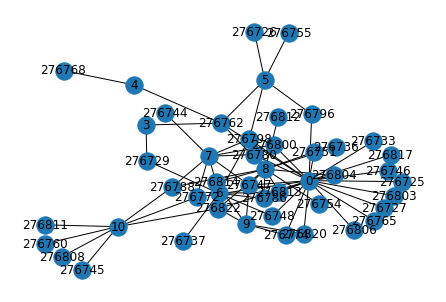

In [ ]:
np.random.seed(0)
nx.draw(grafo_G, with_labels=True)

**Informações** **gerais**

Número de nós do grafo: 47
Número de enlaces do grafo: 71
Densidade do grafo: 0.06567992599444958
Sequência do grau: [1, 23, 1, 5, 1, 2, 2, 7, 1, 1, 12, 1, 1, 8, 1, 7, 1, 4, 5, 2, 2, 1, 1, 1, 5, 2, 1, 1, 3, 2, 2, 3, 3, 2, 4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 5]
Grau médio: 3.021276595744681
Grau máximo: 23
CC = 0.0
Tamanho médio dos caminhos do grafo: 2.917668825161887


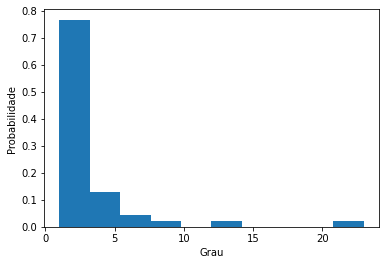

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(grafo_G.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(grafo_G.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(grafo_G)))

# Sequência do grau
deg = [d for n, d in nx.degree(grafo_G)]
print("Sequência do grau: "+ str(deg))

# Grau médio
lambd = np.average(deg, 0)
print("Grau médio: " + str(lambd))

# Grau máximo
print("Grau máximo: " + str(np.max(deg)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(grafo_G)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(grafo_G)))

# Histograma
plt.hist(deg, weights= np.ones_like(deg) / len(deg))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

**Girvan Newman**

**Detecção de comunidades**

Em redes complexas, comunidades representam a organização de vértices em grupos,
que podem ser identificados pela existência de muitas arestas ligando vértices de um
mesmo grupo, que provavelmente possuem propriedades comuns ou desempenham função
similares na rede, e poucas arestas ligando vértices de grupos diferentes. 

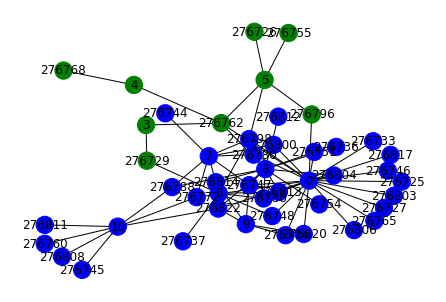

In [ ]:
np.random.seed(0)
comunidades_grafo_G = girvan_newman(grafo_G)
grupos_de_nos_G = []
for com in next(comunidades_grafo_G):
  grupos_de_nos_G.append(list(com))

cores = []
for no in grafo_G:
    if no in grupos_de_nos_G[0]:
        cores.append('blue')
    else: 
        cores.append('green')  
nx.draw(grafo_G, node_color=cores, with_labels=True)
plt.show()

In [ ]:
print("O número de comunidades encontradas é: " + str(len(grafo_G)))

O número de comunidades encontradas é: 47


**Separando as comunidades**


In [ ]:
vizinhos_G = pegar_vizinhos(grafo_G)
lista_de_grafos_G = criarGrafo(vizinhos_G, grupos_de_nos_G)
comunidade_G_1 = lista_de_grafos_G[0]
comunidade_G_2 = lista_de_grafos_G[1]

1.  Primeira comunidade




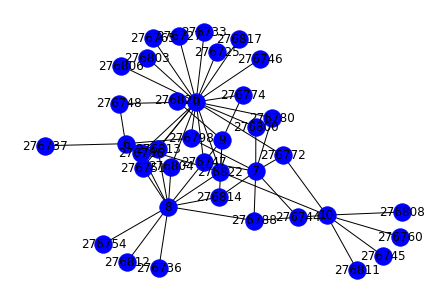

In [ ]:
np.random.seed(0)
nx.draw(comunidade_G_1, with_labels=True, node_color="blue")

Número de nós do grafo: 38
Número de enlaces do grafo: 58
Densidade do grafo: 0.08250355618776671
Sequência do grau: [21, 1, 1, 1, 1, 4, 2, 2, 1, 3, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 5, 1, 11, 1, 6, 8, 1, 3, 3, 1, 1, 5, 7, 1, 1, 1, 1]
Grau médio: 3.0526315789473686
Grau máximo: 21
CC = 0.0
Tamanho médio dos caminhos do grafo: 2.6941678520625887


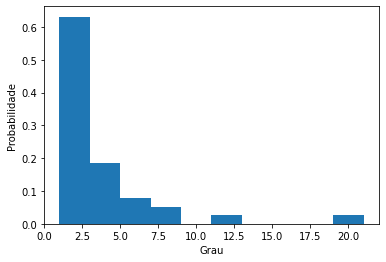

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_G_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_G_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_G_1)))

# Sequência do grau
deg_G_1 = [d for n, d in nx.degree(comunidade_G_1)]
print("Sequência do grau: "+ str(deg_G_1))

# Grau médio
lambd_G_1 = np.average(deg_G_1, 0)
print("Grau médio: " + str(lambd_G_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_G_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_G_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_G_1)))

# Histograma
plt.hist(deg_G_1, weights= np.ones_like(deg_G_1) / len(deg_G_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()



2. Segunda comunidade

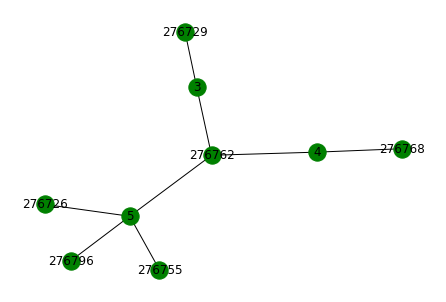

In [ ]:
np.random.seed(0)
nx.draw(comunidade_G_2, with_labels=True, node_color="green")

Número de nós do grafo: 9
Número de enlaces do grafo: 8
Densidade do grafo: 0.2222222222222222
Sequência do grau: [1, 2, 2, 1, 3, 4, 1, 1, 1]
Grau médio: 1.7777777777777777
Grau máximo: 4
CC = 0.0
Tamanho médio dos caminhos do grafo: 2.4444444444444446


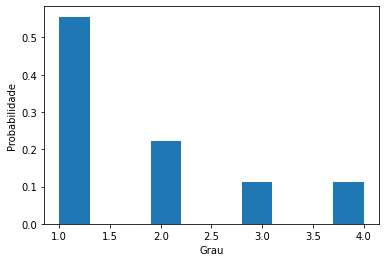

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_G_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_G_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_G_2)))

# Sequência do grau
deg_G_2 = [d for n, d in nx.degree(comunidade_G_2)]
print("Sequência do grau: "+ str(deg_G_2))

# Grau médio
lambd_G_2 = np.average(deg_G_2, 0)
print("Grau médio: " + str(lambd_G_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_G_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_G_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_G_2)))

# Histograma
plt.hist(deg_G_2, weights= np.ones_like(deg_G_2) / len(deg_G_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

**Greedy modularity**

Identificando comunidades

In [ ]:
G_greedy_comunidades = list(greedy_modularity_communities(grafo_G))

In [ ]:
grupo_de_nos_G_greedy = []
for c in G_greedy_comunidades:
  grupo_de_nos_G_greedy.append(list(c))

In [ ]:
print("O número de comunidades encontradas é: " + str(len(grupo_de_nos_G_greedy)))

O número de comunidades encontradas é: 7


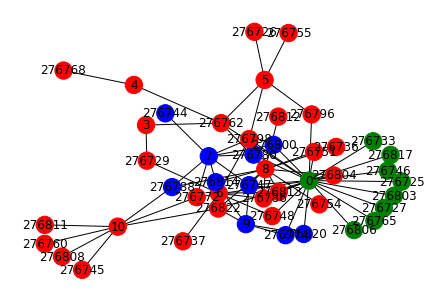

In [ ]:
np.random.seed(0)
cores = []
for no in grafo_G:
    if no in grupo_de_nos_G_greedy[0]:
      cores.append('blue')
    elif no in grupo_de_nos_G_greedy[1]: 
      cores.append('green')
    else:
      cores.append('red')  
nx.draw(grafo_G, node_color=cores, with_labels=True)
plt.show()

**Separando as comunidades**

In [ ]:
vizinhos_G_greedy = pegar_vizinhos(grafo_G)
lista_de_grafos_G_greedy = criarGrafo(vizinhos_G_greedy, grupo_de_nos_G_greedy)
comunidade_G_greedy_1 = lista_de_grafos_G_greedy[0]
comunidade_G_greedy_2 = lista_de_grafos_G_greedy[1]
comunidade_G_greedy_3 = lista_de_grafos_G_greedy[2]

1. Primeira comunidade

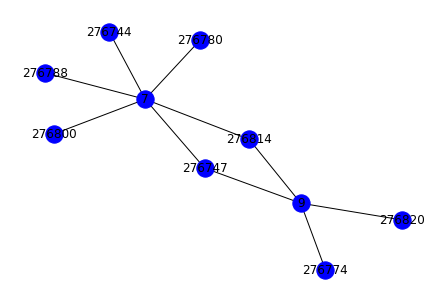

In [ ]:
nx.draw(comunidade_G_greedy_1, with_labels=True, node_color="blue")

Número de nós do grafo: 10
Número de enlaces do grafo: 10
Densidade do grafo: 0.2222222222222222
Sequência do grau: [1, 6, 1, 4, 1, 2, 1, 1, 2, 1]
Grau médio: 2.0
Grau máximo: 6
CC = 0.0
Tamanho médio dos caminhos do grafo: 2.2666666666666666


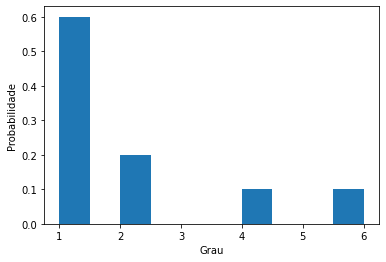

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_G_greedy_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_G_greedy_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_G_greedy_1)))

# Sequência do grau
deg_G_greedy_1 = [d for n, d in nx.degree(comunidade_G_greedy_1)]
print("Sequência do grau: "+ str(deg_karate_greedy_1))

# Grau médio
lambd_G_greedy_1 = np.average(deg_karate_greedy_1, 0)
print("Grau médio: " + str(lambd_G_greedy_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_G_greedy_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_G_greedy_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_G_greedy_1)))

# Histograma
plt.hist(deg_G_greedy_1, weights= np.ones_like(deg_G_greedy_1) / len(deg_G_greedy_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

2. Segunda comunidade

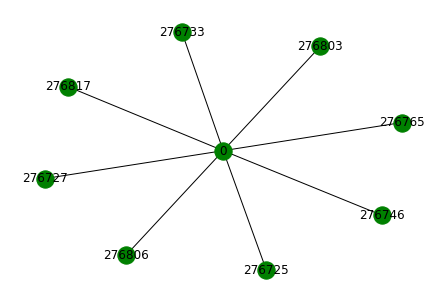

In [ ]:
np.random.seed(0)
nx.draw(comunidade_G_greedy_2, with_labels=True, node_color="green")

Número de nós do grafo: 9
Número de enlaces do grafo: 8
Densidade do grafo: 0.2222222222222222
Sequência do grau: [8, 1, 1, 1, 1, 1, 1, 1, 1]
Grau médio: 1.7777777777777777
Grau máximo: 8
CC = 0.0
Tamanho médio dos caminhos do grafo: 1.7777777777777777


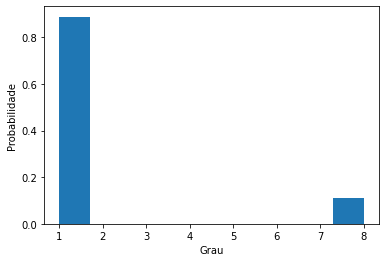

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_G_greedy_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_G_greedy_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_G_greedy_2)))

# Sequência do grau
deg_G_greedy_2 = [d for n, d in nx.degree(comunidade_G_greedy_2)]
print("Sequência do grau: "+ str(deg_G_greedy_2))

# Grau médio
lambd_G_greedy_2 = np.average(deg_G_greedy_2, 0)
print("Grau médio: " + str(lambd_G_greedy_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_G_greedy_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_G_greedy_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_G_greedy_2)))

# Histograma
plt.hist(deg_G_greedy_2, weights= np.ones_like(deg_G_greedy_2) / len(deg_G_greedy_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

3. Terceira comunidade

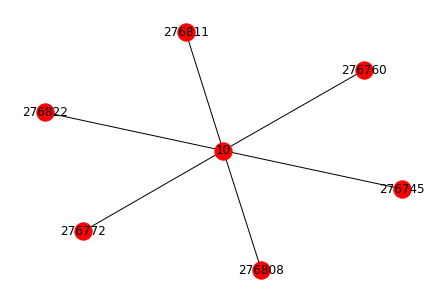

In [ ]:
np.random.seed(0)
nx.draw(comunidade_G_greedy_3, with_labels=True, node_color="red")

Número de nós do grafo: 7
Número de enlaces do grafo: 6
Densidade do grafo: 0.2857142857142857
Sequência do grau: [1, 6, 1, 1, 1, 1, 1]
Grau médio: 1.7142857142857142
Grau máximo: 6
CC = 0.0
Tamanho médio dos caminhos do grafo: 1.7142857142857142


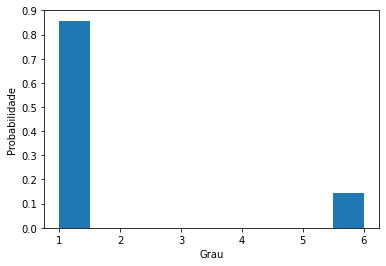

In [ ]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_G_greedy_3.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_G_greedy_3.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_G_greedy_3)))

# Sequência do grau
deg_G_greedy_3 = [d for n, d in nx.degree(comunidade_G_greedy_3)]
print("Sequência do grau: "+ str(deg_G_greedy_3))

# Grau médio
lambd_G_greedy_3 = np.average(deg_G_greedy_3, 0)
print("Grau médio: " + str(lambd_G_greedy_3))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_G_greedy_3)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_G_greedy_3)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_G_greedy_3)))

# Histograma
plt.hist(deg_G_greedy_3, weights= np.ones_like(deg_G_greedy_3) / len(deg_G_greedy_3))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

# **BX-Books**

In [ ]:
Books =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Books.csv', sep=';', escapechar='\\', encoding='CP1252',
                          low_memory=False)

**- Tratamento de dados**










In [ ]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [ ]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# **Exemplo**

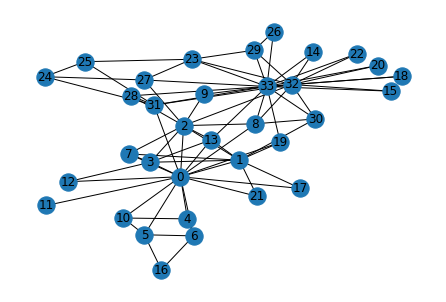

In [ ]:
# carregar o grafo Club Karate já existente na biblioteca network
G = nx.karate_club_graph()

# visualizar o grafo 
nx.draw(G, with_labels = True)

In [ ]:
# número de nós e de arestas
len(G.nodes), len(G.edges)

(34, 78)

In [ ]:
def draw(G, pos, measures, measure_name):

  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                 node_color=list(measures. values()),
                                 nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  # labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_labels(G, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


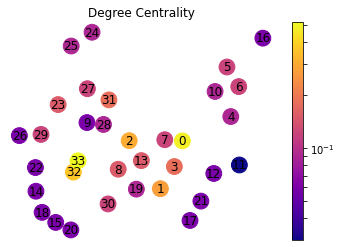

In [ ]:
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extrai o nó com maior score EBC 
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
#agora vamos utilizar a função acima para encontrar as comunidades - subgrafos
def girvan_newman(graph):
	# procura número de conexões
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# vamos encontrar as comunidades no grafo
c = girvan_newman(G.copy())

# as comunidades são formadas por quais nós
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

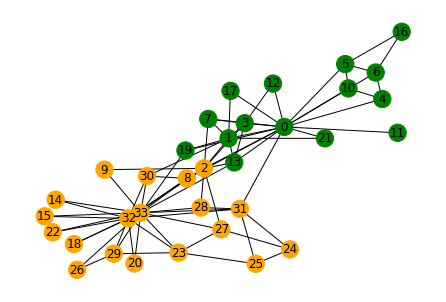

In [ ]:
# visualizar graficamente as comunidades
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('green')
    else: 
        color_map.append('orange')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# **BX-Users**

In [ ]:
Users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Users.csv', sep=";", encoding='cp1252')

**- Tratamento de dados**

In [ ]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
